Titanic Survival Prediction using Logistic Regression
=

Import modules
=

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import Dataset
=

In [43]:
df=pd.read_csv("Titanic-Dataset.csv")

In [8]:
df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Pre-Processing
=

df.isnull().sum()

In [10]:
x=df[["Pclass","Sex","Age"]]
y=df.Survived

In [11]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [12]:
x.Age.fillna(x.Age.mean(),inplace=True)

In [13]:
x

,Pclass,Sex,Age
0,3,male,22.000000
1,1,female,38.000000
2,3,female,26.000000
3,1,female,35.000000
4,3,male,35.000000
...,...,...,...
886,2,male,27.000000
887,1,female,19.000000
888,3,female,29.699118
889,1,male,26.000000


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gen=le.fit_transform(x.Sex)

In [15]:
x["Gender"]=gen
x.drop("Sex",axis=1,inplace=True)

In [16]:
x.isnull().sum()

Pclass    0
Age       0
Gender    0
dtype: int64

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Data Visualization
=

<Axes: xlabel='Survived', ylabel='count'>

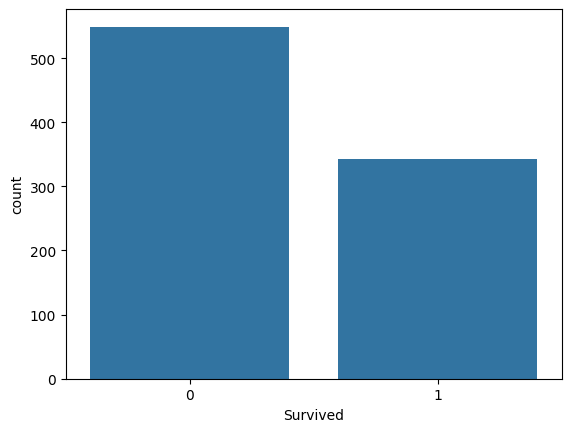

In [46]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

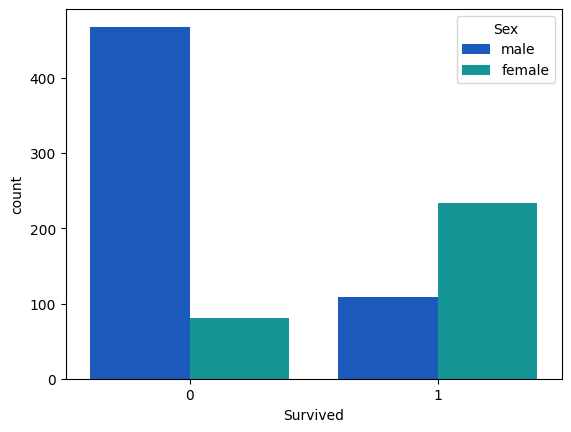

In [47]:
sns.countplot(x="Survived",hue='Sex',data=df,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

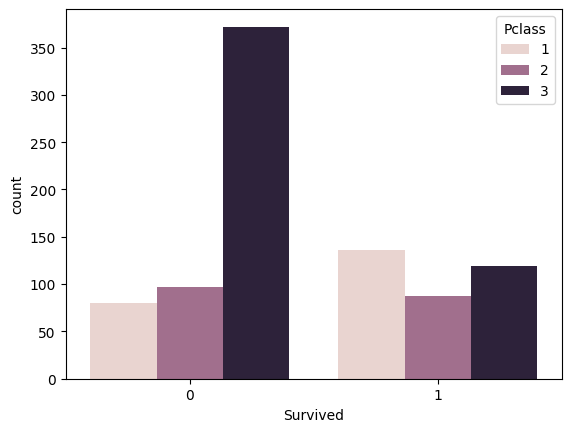

In [61]:
sns.countplot(x='Survived', hue='Pclass', data=df)

The Median age of passengers is : 28


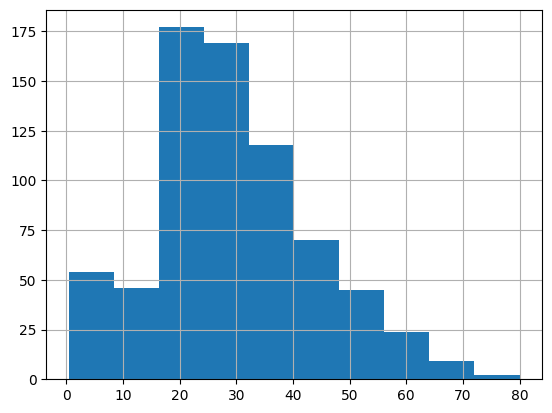

In [64]:
df.Age.hist()
print("The Median age of passengers is :", int(df.Age.median()))

<Axes: >

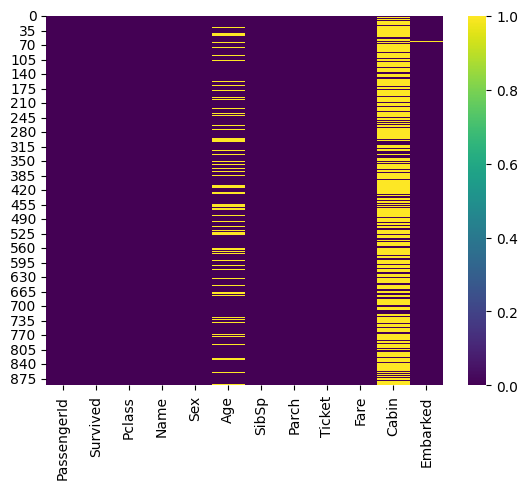

In [50]:
sns.heatmap(df.isnull(),cmap='viridis')

<Axes: >

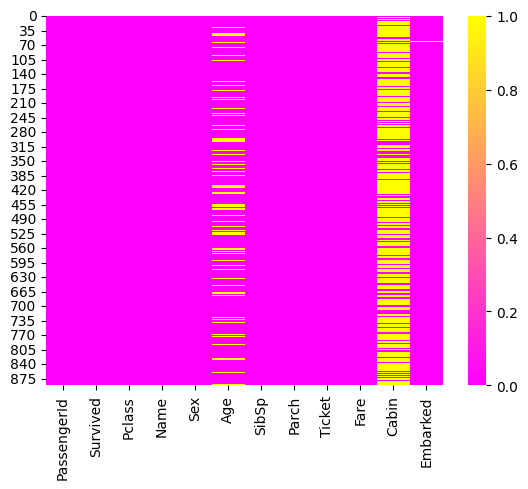

In [51]:
sns.heatmap(df.isnull(),cmap='spring')

Training the model
=

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [20]:
len(train_x)

712

In [21]:
len(test_x)

179

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [54]:
train_x.shape

(712, 3)

In [23]:
model=LogisticRegression()

In [24]:
model.fit(train_x,train_y)

LogisticRegression()

In [25]:
model.score(test_x,test_y)

0.7486033519553073

In [26]:
x.head()

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [38]:
#1--->Male
#0--->Female

In [39]:
if model.predict([[3,70,1]])[0]==1:
    print("survived")
else:
    print("not survived")

not survived


Model Evaluation
=

In [57]:
prediction=model.predict(test_x)
confusion_matrix(test_y,prediction)
accuracy_score(test_y,prediction)

0.7486033519553073

In [60]:
prediction=model.predict(train_x)
confusion_matrix(train_y,prediction)
accuracy_score(train_y,prediction)

0.8132022471910112

In [40]:
import pickle

In [41]:
pickle.dump(model,open('titanic2.pkl','wb'))